<a href="https://colab.research.google.com/github/Lourarhi-Yahya/movies-Recommendation-system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation Des Données

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [ ]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


In [ ]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [ ]:
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [ ]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
merged_dataset.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


Data Visualization

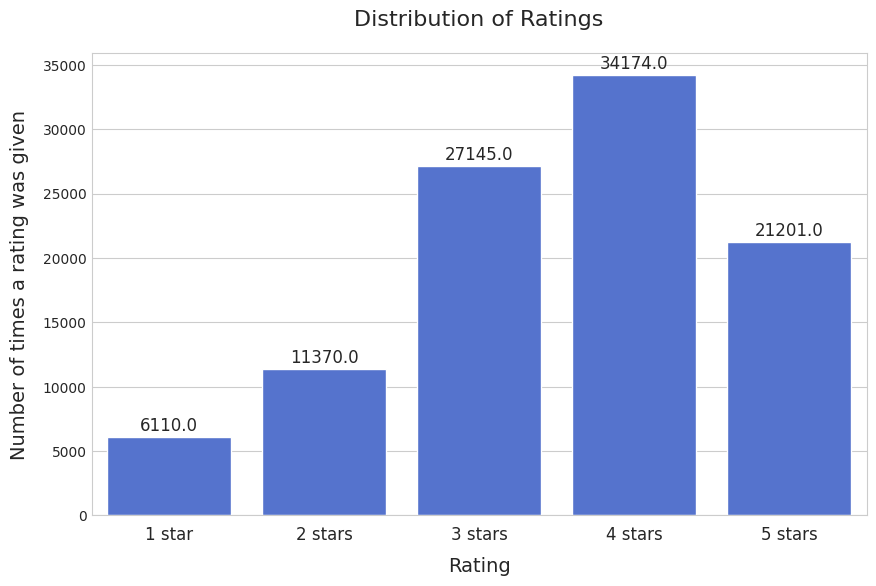

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plot
sns.set_style("whitegrid")

# Create a bar plot of rating frequency
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="rating", data=merged_dataset, ax=ax, color="royalblue")

# Set axis labels and title
ax.set_xlabel("Rating", fontsize=14, labelpad=10)
ax.set_ylabel("Number of times a rating was given", fontsize=14, labelpad=10)
ax.set_title("Distribution of Ratings", fontsize=16, pad=20)

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 500, height,
            ha="center", fontsize=12)

# Adjust the x-axis tick labels and remove y-axis ticks
ax.set_xticklabels(["1 star", "2 stars", "3 stars", "4 stars", "5 stars"],
                   fontsize=12, rotation=0)
ax.tick_params(axis="y", which="both", length=0)

# Show the plot
plt.show()


In [ ]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [ ]:
avg_highly_rated_movies.head(20)

,rating
movie title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


In [ ]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))

Number of movies with 5 star rating on average:  10
Number of movies with above 4 star and below 5 star rating on average:  163
Number of movies with above 3 star and below 4 star rating on average:  871
Number of movies with above 2 star and below 3 star rating on average:  492
Number of movies with above 1 star and below 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


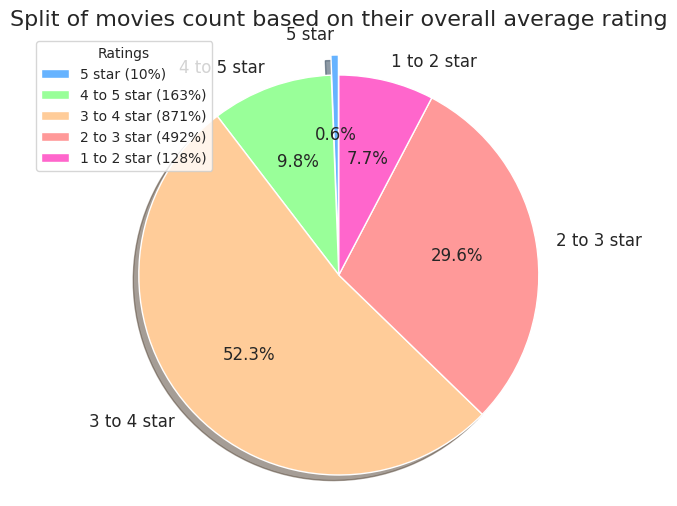

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
sizes = [10, 163, 871, 492, 128]
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#ff66cc']
explode = (0.1, 0, 0, 0, 0)  # explode the first slice (i.e. '5 star')

# Plot
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Split of movies count based on their overall average rating', fontsize=16)

# Add legend
legend_labels = [f'{label} ({size}%)' for label, size in zip(labels, sizes)]
plt.legend(loc='upper left', labels=legend_labels, prop={'size': 10}, title='Ratings')

plt.show()


In [ ]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

In [ ]:
avg_highly_rated_movies.columns = ['movie title', 'avg rating']

avg_highly_rated_movies.head(10)

,movie title,avg rating
0,They Made Me a Criminal (1939),5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
2,"Saint of Fort Washington, The (1993)",5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
5,"Great Day in Harlem, A (1994)",5.0
6,Aiqing wansui (1994),5.0
7,Santa with Muscles (1996),5.0
8,Prefontaine (1997),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0


In [ ]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

movie title
Star Wars (1977)                             2541
Fargo (1996)                                 2111
Return of the Jedi (1983)                    2032
Contact (1997)                               1936
Raiders of the Lost Ark (1981)               1786
                                             ... 
T-Men (1947)                                    1
JLG/JLG - autoportrait de décembre (1994)       1
Careful (1992)                                  1
Invitation, The (Zaproszenie) (1986)            1
Hedd Wyn (1992)                                 1
Name: rating, Length: 1664, dtype: int64

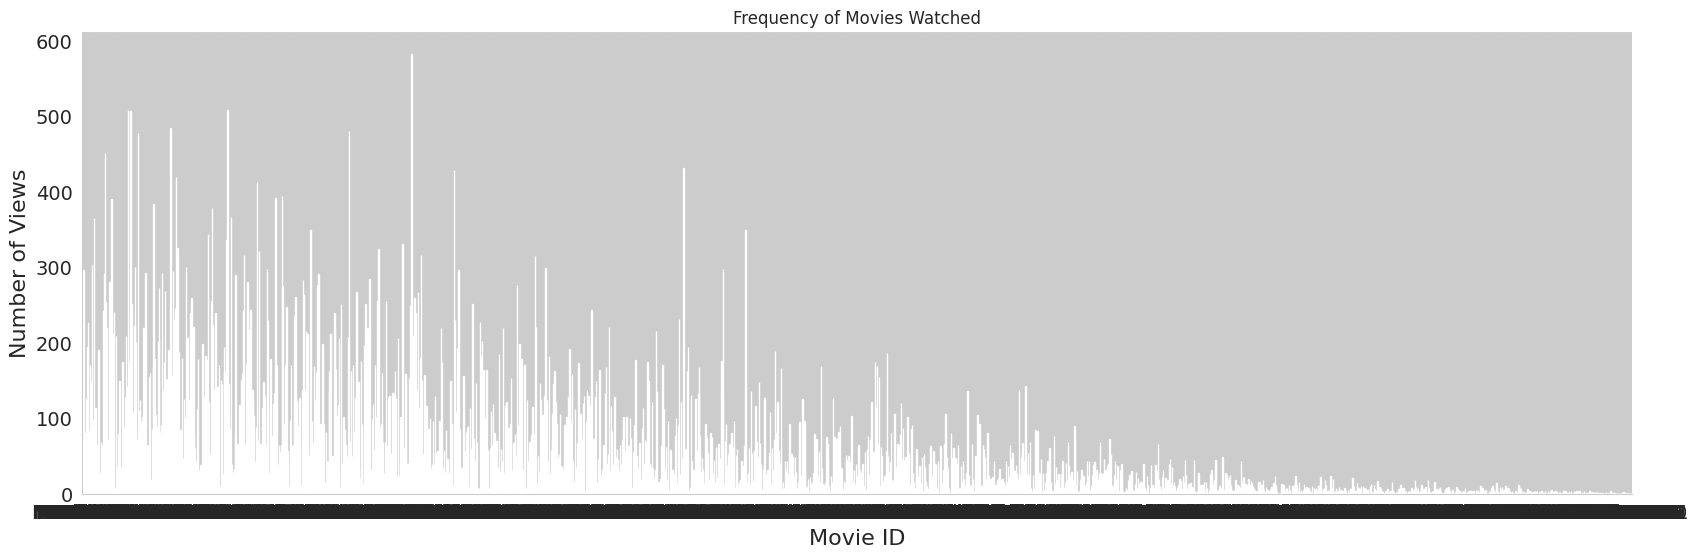

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot of movie frequency
movie_freq = merged_dataset['movie id'].value_counts(sort=False)
ax = movie_freq.plot(kind='bar', figsize=(20,6), rot=0)

# set plot title and axis labels
ax.set_title('Frequency of Movies Watched')
ax.set_xlabel('Movie ID')
ax.set_ylabel('Number of Views')

# customize tick labels
tick_labels = ['Movie {}'.format(id) for id in movie_freq.index]
ax.set_xticklabels(tick_labels)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add gridlines to y-axis
ax.yaxis.grid(True)

# increase font size of axis labels and tick labels
ax.tick_params(axis='both', labelsize=14)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# show the plot
plt.show()


In [ ]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)


In [ ]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [ ]:
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))


Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


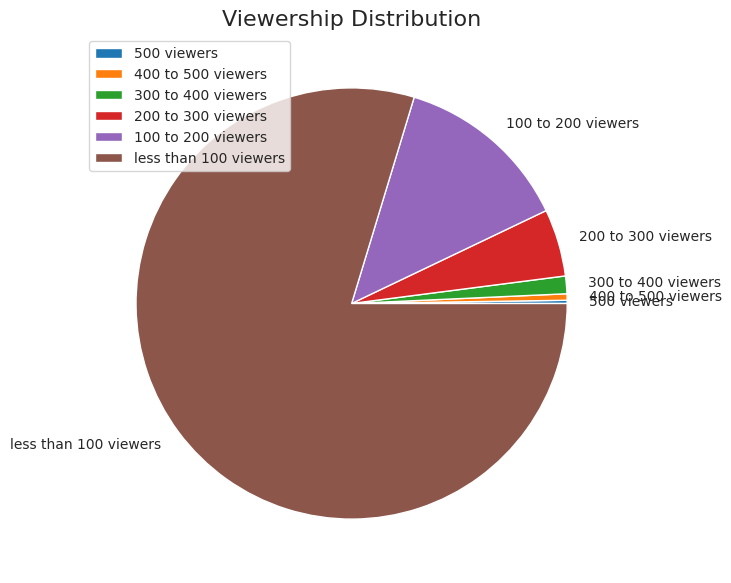

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'viewers': [4, 8, 22, 84, 220, 1326]},
                  index=['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plot = df.plot.pie(y='viewers', figsize=(7, 7), colors=colors)

plot.set_title('Viewership Distribution', fontsize=16)
plot.set_ylabel('', fontsize=14)

plot.legend()

plt.show()


In [ ]:
popular_movies[popular_movies['Number of Users watched'] >= 400]

,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


In [ ]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,avg rating,Number of Users watched
0,They Made Me a Criminal (1939),5.0,1
1,Marlene Dietrich: Shadow and Light (1996),5.0,1
2,"Saint of Fort Washington, The (1993)",5.0,2
3,Someone Else's America (1995),5.0,1
4,Star Kid (1997),5.0,3
5,"Great Day in Harlem, A (1994)",5.0,1
6,Aiqing wansui (1994),5.0,1
7,Santa with Muscles (1996),5.0,2
8,Prefontaine (1997),5.0,3
9,Entertaining Angels: The Dorothy Day Story (1996),5.0,1


In [ ]:
highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>400]

,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
236,Toy Story (1995),3.878319,452
292,Contact (1997),3.803536,509
412,"English Patient, The (1996)",3.656965,481
428,Air Force One (1997),3.631090,431
597,Scream (1996),3.441423,478


In [ ]:
movie_genre_list = column_names2[-19:]
movie_genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

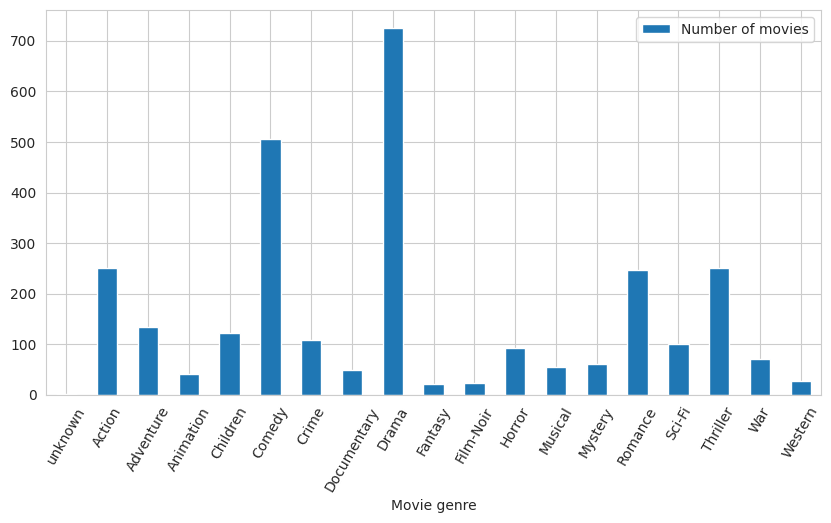

In [ ]:
count = []
for i in movie_genre_list:
  # print(i)
  genre_based_movies = items_dataset[['movie id','movie title',i]]
  genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
  count.append(len(genre_based_movies))
  # merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # star_based_visualization(merged_genre_movies)
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(10, 5))

In [ ]:
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  # label = list(dataframe['rating'].value_counts(sort=False))
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")


In [ ]:
def recommendations_genre(genre):
  x = genre
  print("****************************     ******************************     ******************************")
  print("****************************     ****** GENRE: ", x," ******     ******************************")
  print("    ")
  genre_based_movies = items_dataset[['movie id','movie title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # merged_genre_movies.head()

  star_based_visualization(merged_genre_movies)
  high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  high_rated_movies = high_rated_movies.to_frame()
  print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
  print(high_rated_movies.head(10))
  print("****************************     ******************************     ******************************")
  popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  popular_movies_ingenre = popular_movies_ingenre.to_frame()
  popular_movies_ingenre.reset_index(level=0, inplace=True)
  popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
  print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
  print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))
  print("****************************     ******************************     ******************************")
  highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
  # highly_rated_popular_movies.head(10)
  viewer_limit = 300
  ratings_limit = 4.0
  count = 0
  check = 0
  while viewer_limit > 0 and ratings_limit > 0:
    s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_limit) & (highly_rated_popular_movies['rating']>=ratings_limit)]
    if len(s) < 11:
      if check == 0:
        viewer_limit -= 50
        check = 1
      else:
        ratings_limit -= 0.5
        check = 0
    else:
      break
  print("These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.")
  print("These have rating more than ",ratings_limit," with atleast ",viewer_limit ," viewers.")

  print("**Recommendations based popularity and rating. These are top rated popular movies**")
  print(s)
  print("****************************     ******************************     ******************************")
  print("                             ")
  print("                             ")


****************************     ******************************     ******************************
****************************     ****** GENRE:  Action  ******     ******************************
    


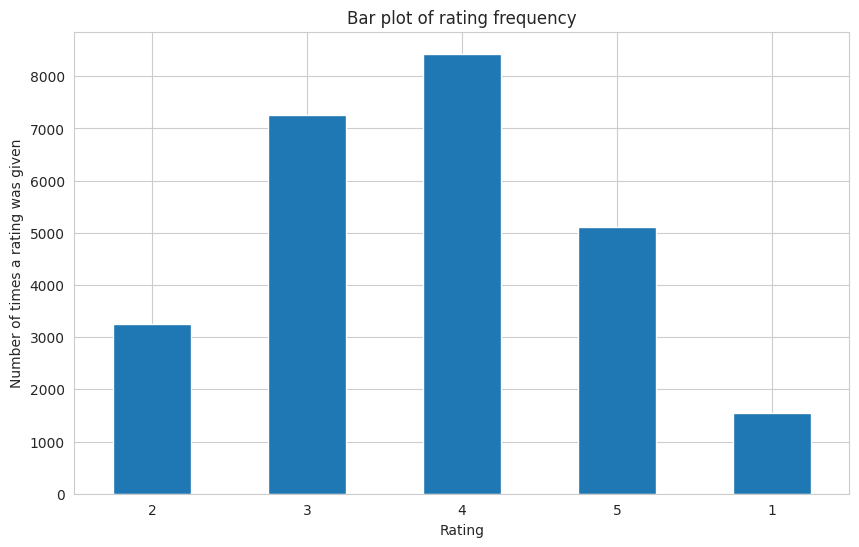

Total number of users watched this Genre:  25589
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Action . Recommendations based on top average ratings.
                                   rating
movie title                              
Star Wars (1977)                 4.358491
Godfather, The (1972)            4.283293
Raiders of the Lost Ark (1981)   4.252381
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Boot, Das (1981)                 4.203980
Godfather: Part II, The (1974)   4.186603
African Queen, The (1951)        4.184211
Princess Bride, The (1987)       4.172840
Braveheart (1995)                4.151515
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Action genre. Recommendations based on Popularity
                       movie title  Number of Users watched
0

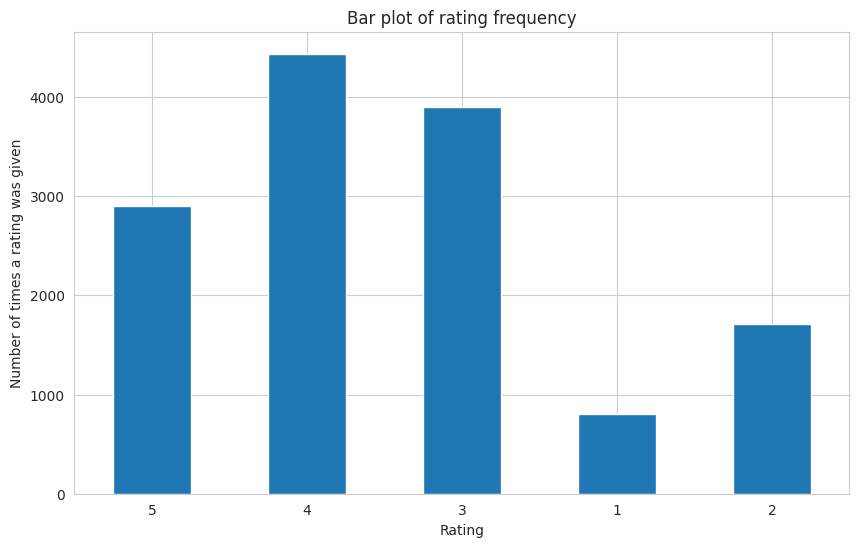

Total number of users watched this Genre:  13753
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Adventure . Recommendations based on top average ratings.
                                            rating
movie title                                       
Star Kid (1997)                           5.000000
Star Wars (1977)                          4.358491
Raiders of the Lost Ark (1981)            4.252381
Lawrence of Arabia (1962)                 4.231214
Empire Strikes Back, The (1980)           4.204360
African Queen, The (1951)                 4.184211
Princess Bride, The (1987)                4.172840
Great Escape, The (1963)                  4.104839
Treasure of the Sierra Madre, The (1948)  4.100000
Wizard of Oz, The (1939)                  4.077236
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in 

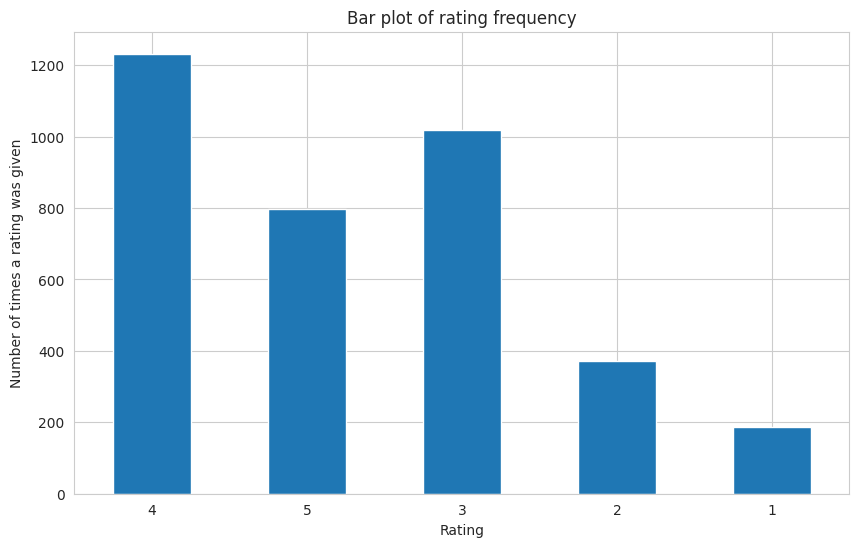

Total number of users watched this Genre:  3605
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Animation . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Close Shave, A (1995)                               4.491071
Wrong Trousers, The (1993)                          4.466102
Wallace & Gromit: The Best of Aardman Animation...  4.447761
Faust (1994)                                        4.200000
Grand Day Out, A (1992)                             4.106061
Toy Story (1995)                                    3.878319
Aladdin (1992)                                      3.812785
Winnie the Pooh and the Blustery Day (1968)         3.800000
Beauty and the Beast (1991)                         3.792079
Lion King, The (1994)                               3.781818
****************************     ***********************

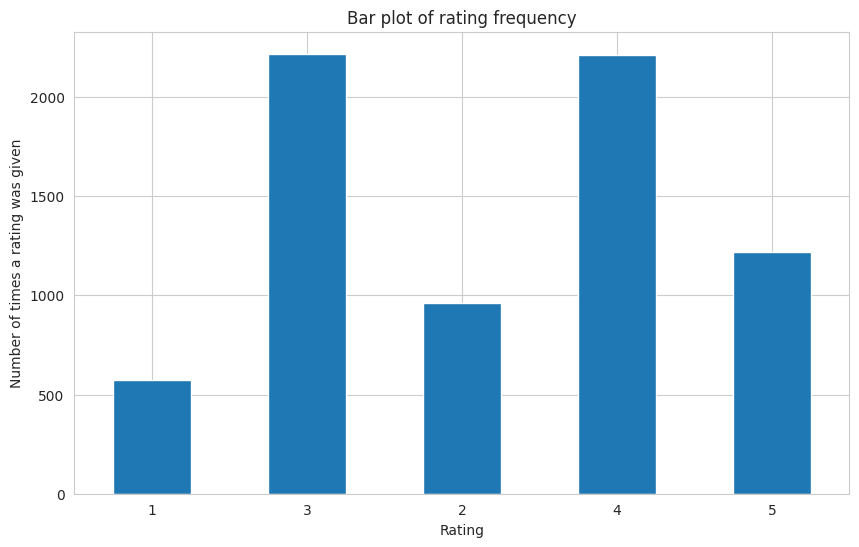

Total number of users watched this Genre:  7182
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Children . Recommendations based on top average ratings.
                                               rating
movie title                                          
Star Kid (1997)                              5.000000
Wizard of Oz, The (1939)                     4.077236
Babe (1995)                                  3.995434
Toy Story (1995)                             3.878319
E.T. the Extra-Terrestrial (1982)            3.833333
Aladdin (1992)                               3.812785
Winnie the Pooh and the Blustery Day (1968)  3.800000
Beauty and the Beast (1991)                  3.792079
Lion King, The (1994)                        3.781818
Fantasia (1940)                              3.770115
****************************     ******************************     ******************************
These are the most popular movies which ca

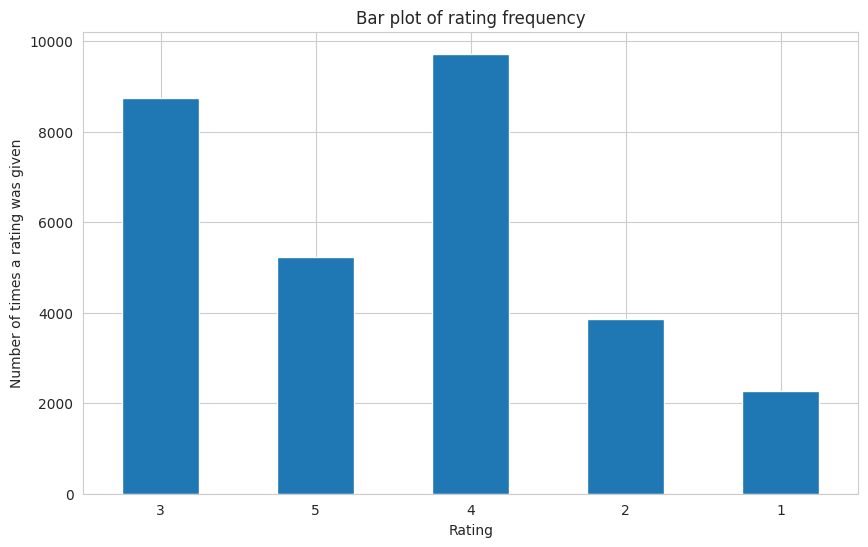

Total number of users watched this Genre:  29832
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Comedy . Recommendations based on top average ratings.
                              rating
movie title                         
Santa with Muscles (1996)   5.000000
Close Shave, A (1995)       4.491071
Wrong Trousers, The (1993)  4.466102
North by Northwest (1959)   4.284916
Shall We Dance? (1996)      4.260870
As Good As It Gets (1997)   4.196429
Cinema Paradiso (1988)      4.173554
Princess Bride, The (1987)  4.172840
Waiting for Guffman (1996)  4.127660
A Chef in Love (1996)       4.125000
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Comedy genre. Recommendations based on Popularity
                                    movie title  Number of Users watched
0                              Liar Liar (1997) 

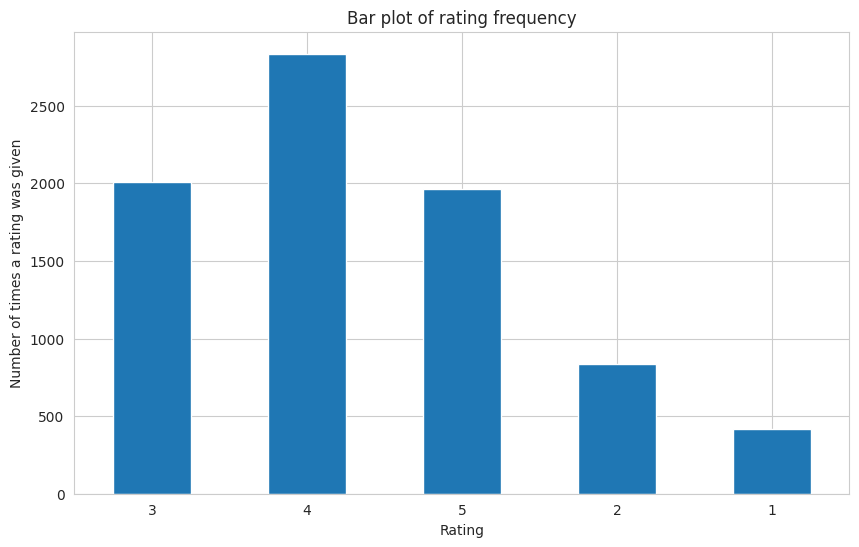

Total number of users watched this Genre:  8055
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Crime . Recommendations based on top average ratings.
                                   rating
movie title                              
They Made Me a Criminal (1939)   5.000000
Usual Suspects, The (1995)       4.385768
Letter From Death Row, A (1998)  4.333333
Godfather, The (1972)            4.283293
Crossfire (1947)                 4.250000
Godfather: Part II, The (1974)   4.186603
L.A. Confidential (1997)         4.161616
Fargo (1996)                     4.155512
Laura (1944)                     4.100000
Once Were Warriors (1994)        4.064516
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Crime genre. Recommendations based on Popularity
                      movie title  Number of Users watched
0    

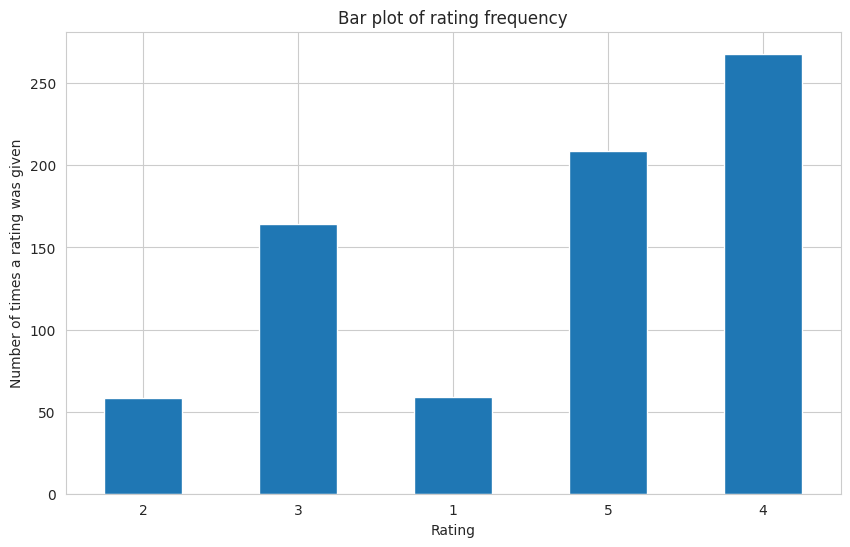

Total number of users watched this Genre:  758
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Documentary . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Marlene Dietrich: Shadow and Light (1996)           5.000000
Great Day in Harlem, A (1994)                       5.000000
Everest (1998)                                      4.500000
Maya Lin: A Strong Clear Vision (1994)              4.500000
Hoop Dreams (1994)                                  4.094017
Paradise Lost: The Child Murders at Robin Hood ...  4.050000
When We Were Kings (1996)                           4.045455
Nico Icon (1995)                                    4.000000
Jupiter's Wife (1994)                               4.000000
Perfect Candidate, A (1996)                         4.000000
****************************     **********************

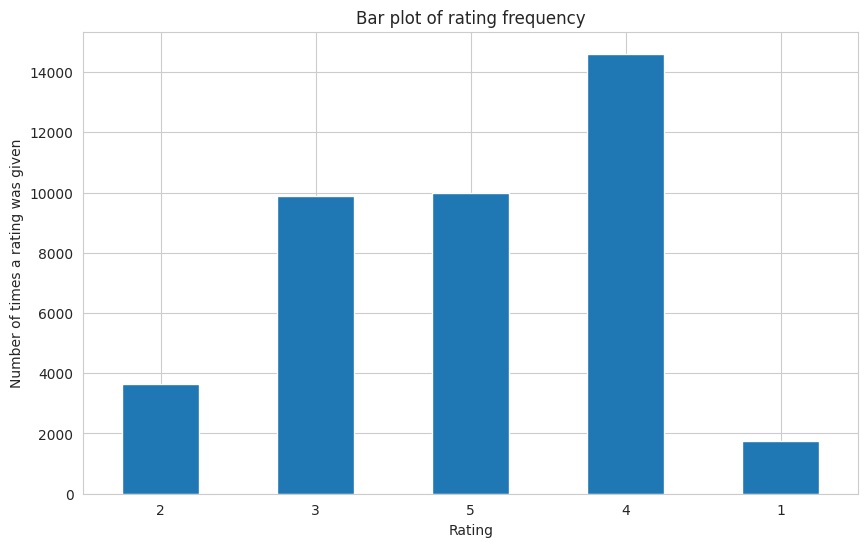

Total number of users watched this Genre:  39895
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Drama . Recommendations based on top average ratings.
                                                     rating
movie title                                                
Aiqing wansui (1994)                               5.000000
Saint of Fort Washington, The (1993)               5.000000
Prefontaine (1997)                                 5.000000
Entertaining Angels: The Dorothy Day Story (1996)  5.000000
They Made Me a Criminal (1939)                     5.000000
Someone Else's America (1995)                      5.000000
Pather Panchali (1955)                             4.625000
Anna (1996)                                        4.500000
Some Mother's Son (1996)                           4.500000
Schindler's List (1993)                            4.466443
****************************     ******************************     ***

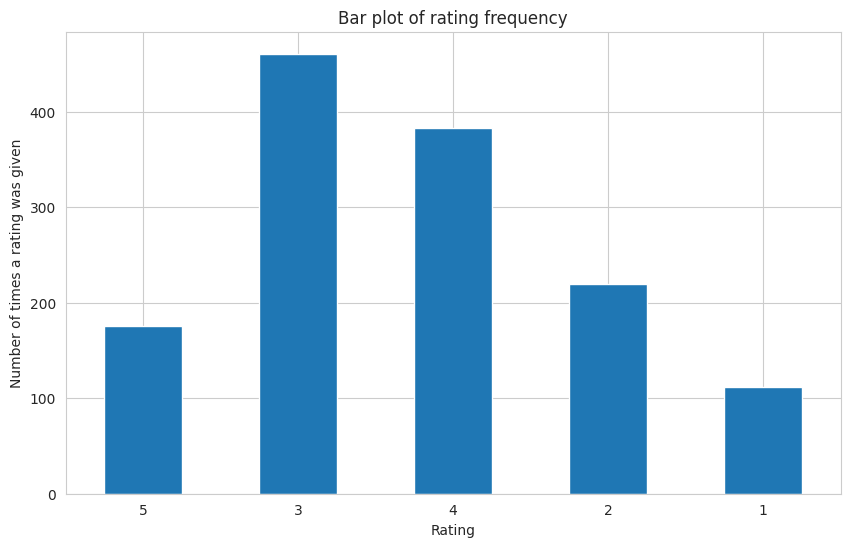

Total number of users watched this Genre:  1352
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Fantasy . Recommendations based on top average ratings.
                                       rating
movie title                                  
Star Kid (1997)                      5.000000
E.T. the Extra-Terrestrial (1982)    3.833333
Heavenly Creatures (1994)            3.671429
20,000 Leagues Under the Sea (1954)  3.500000
Jumanji (1995)                       3.312500
Mask, The (1994)                     3.193798
Dragonheart (1996)                   3.082278
Warriors of Virtue (1997)            3.000000
FairyTale: A True Story (1997)       2.966667
Escape to Witch Mountain (1975)      2.966667
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Fantasy genre. Recommendations based on Popularity
            

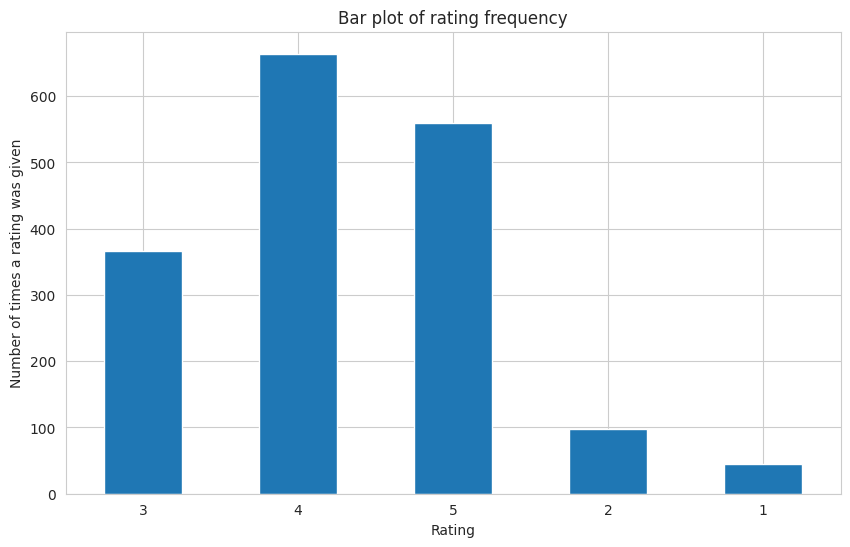

Total number of users watched this Genre:  1733
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Film-Noir . Recommendations based on top average ratings.
                                    rating
movie title                               
Manchurian Candidate, The (1962)  4.259542
Crossfire (1947)                  4.250000
Maltese Falcon, The (1941)        4.210145
Sunset Blvd. (1950)               4.200000
L.A. Confidential (1997)          4.161616
Blade Runner (1982)               4.138182
Chinatown (1974)                  4.136054
Notorious (1946)                  4.115385
Laura (1944)                      4.100000
Big Sleep, The (1946)             4.027397
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Film-Noir genre. Recommendations based on Popularity
                        movie title  Number 

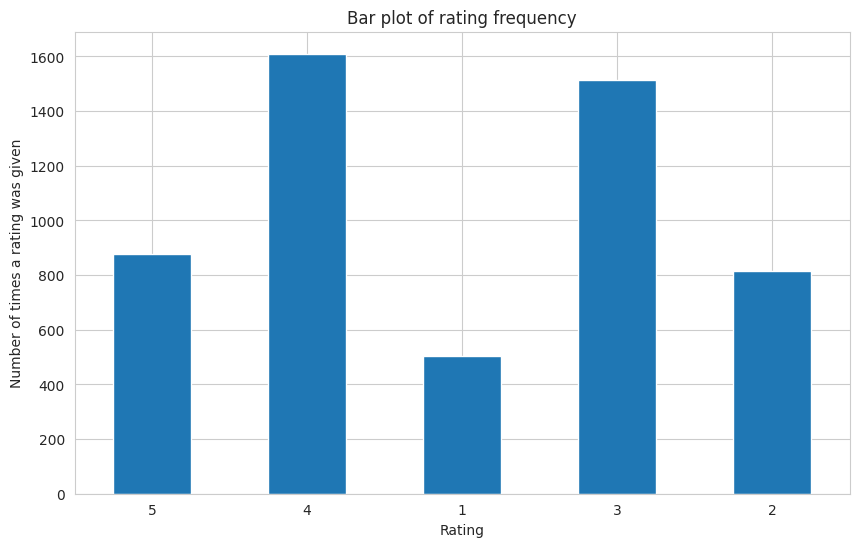

Total number of users watched this Genre:  5317
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Horror . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Psycho (1960)                                       4.100418
Alien (1979)                                        4.034364
Young Frankenstein (1974)                           3.945000
Braindead (1992)                                    3.857143
Shining, The (1980)                                 3.825243
Birds, The (1963)                                   3.808642
Jaws (1975)                                         3.775000
Night Flier (1997)                                  3.714286
Bride of Frankenstein (1935)                        3.608696
Nosferatu (Nosferatu, eine Symphonie des Grauen...  3.555556
****************************     **************************

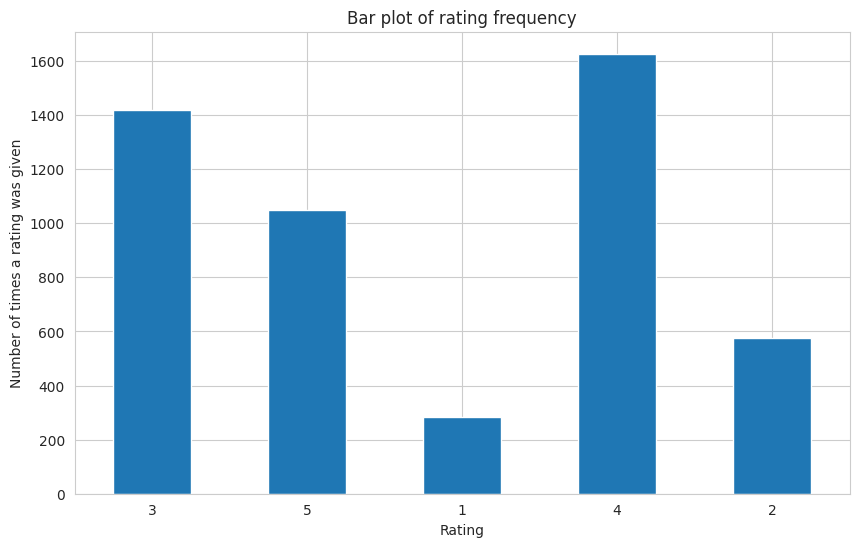

Total number of users watched this Genre:  4954
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Musical . Recommendations based on top average ratings.
                                rating
movie title                           
Wizard of Oz, The (1939)      4.077236
Top Hat (1935)                4.047619
Damsel in Distress, A (1937)  4.000000
Singin' in the Rain (1952)    3.992701
This Is Spinal Tap (1984)     3.905759
Gay Divorcee, The (1934)      3.866667
Blues Brothers, The (1980)    3.836653
My Fair Lady (1964)           3.816000
Aladdin (1992)                3.812785
Beauty and the Beast (1991)   3.792079
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Musical genre. Recommendations based on Popularity
                   movie title  Number of Users watched
0                 Evita (1996)          

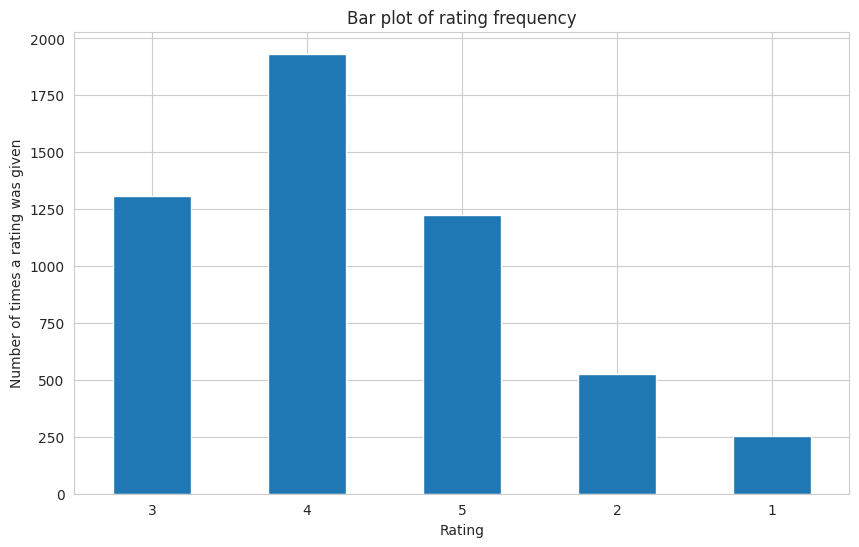

Total number of users watched this Genre:  5245
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Mystery . Recommendations based on top average ratings.
                               rating
movie title                          
Rear Window (1954)           4.387560
Third Man, The (1949)        4.333333
Vertigo (1958)               4.251397
Maltese Falcon, The (1941)   4.210145
Amadeus (1984)               4.163043
L.A. Confidential (1997)     4.161616
Thin Man, The (1934)         4.150000
Chinatown (1974)             4.136054
Laura (1944)                 4.100000
Arsenic and Old Lace (1944)  4.078261
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Mystery genre. Recommendations based on Popularity
                    movie title  Number of Users watched
0    Mission: Impossible (1996)                    

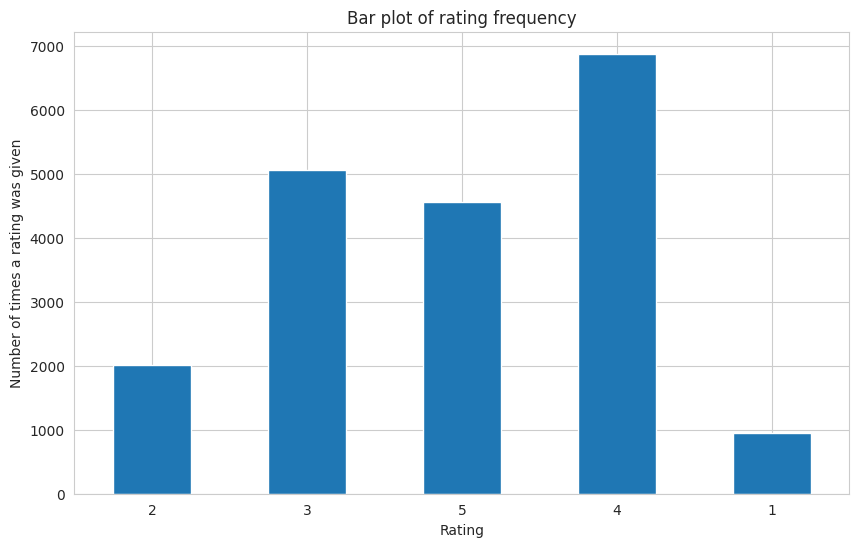

Total number of users watched this Genre:  19461
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Romance . Recommendations based on top average ratings.
                                   rating
movie title                              
Casablanca (1942)                4.456790
Star Wars (1977)                 4.358491
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Affair to Remember, An (1957)    4.192308
African Queen, The (1951)        4.184211
Cinema Paradiso (1988)           4.173554
Princess Bride, The (1987)       4.172840
Notorious (1946)                 4.115385
Philadelphia Story, The (1940)   4.115385
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Romance genre. Recommendations based on Popularity
                       movie title  Number of Users watched

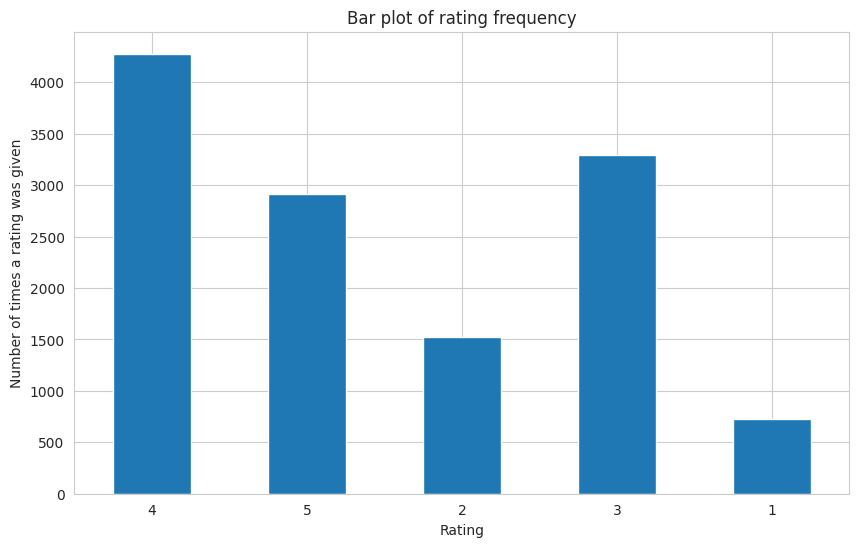

Total number of users watched this Genre:  12730
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Sci-Fi . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Star Kid (1997)                                     5.000000
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Empire Strikes Back, The (1980)                     4.204360
Blade Runner (1982)                                 4.138182
Alien (1979)                                        4.034364
Return of the Jedi (1983)                           4.007890
Terminator 2: Judgment Day (1991)                   4.006780
2001: A Space Odyssey (1968)                        3.969112
Aliens (1986)                                       3.947183
****************************     *************************

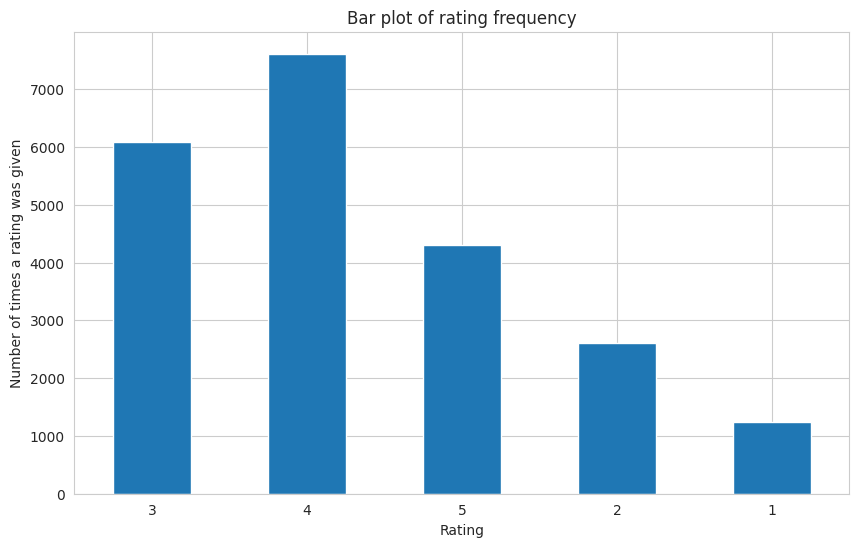

Total number of users watched this Genre:  21872
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Thriller . Recommendations based on top average ratings.
                                           rating
movie title                                      
Close Shave, A (1995)                    4.491071
Rear Window (1954)                       4.387560
Usual Suspects, The (1995)               4.385768
Third Man, The (1949)                    4.333333
Some Folks Call It a Sling Blade (1993)  4.292683
Silence of the Lambs, The (1991)         4.289744
North by Northwest (1959)                4.284916
Manchurian Candidate, The (1962)         4.259542
Vertigo (1958)                           4.251397
Innocents, The (1961)                    4.250000
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Thriller genr

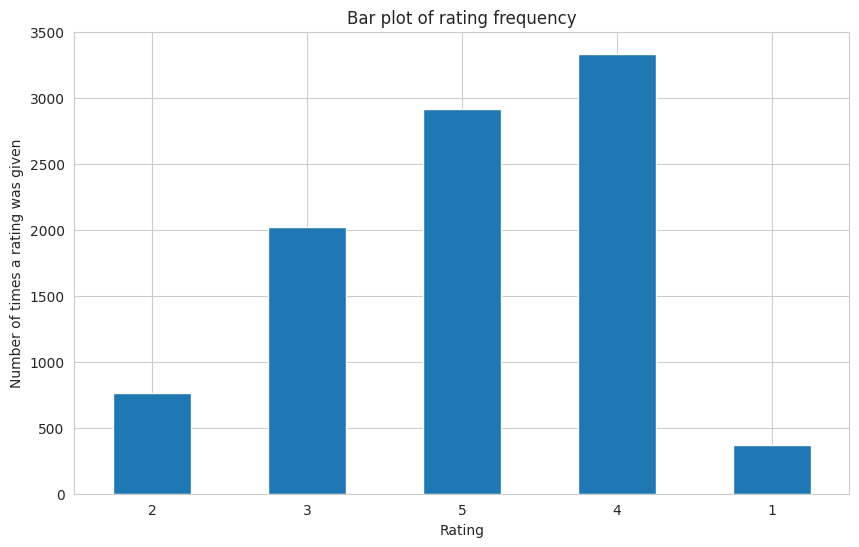

Total number of users watched this Genre:  9398
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: War . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Schindler's List (1993)                             4.466443
Casablanca (1942)                                   4.456790
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Lawrence of Arabia (1962)                           4.231214
Paths of Glory (1957)                               4.212121
Empire Strikes Back, The (1980)                     4.204360
Boot, Das (1981)                                    4.203980
African Queen, The (1951)                           4.184211
Bridge on the River Kwai, The (1957)                4.175758
****************************     *****************************

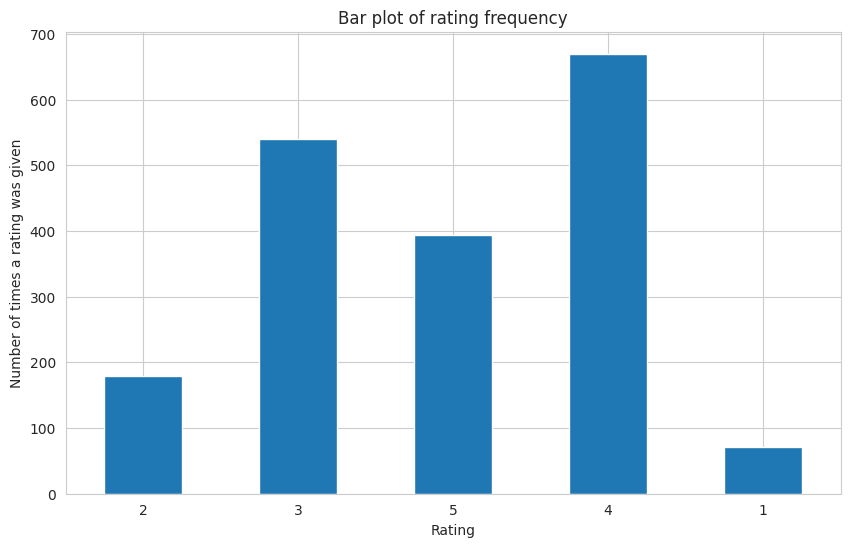

Total number of users watched this Genre:  1854
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Western . Recommendations based on top average ratings.
                                             rating
movie title                                        
High Noon (1952)                           4.102273
Wild Bunch, The (1969)                     4.023256
Butch Cassidy and the Sundance Kid (1969)  3.949074
Magnificent Seven, The (1954)              3.942149
Once Upon a Time in the West (1969)        3.868421
Unforgiven (1992)                          3.868132
Good, The Bad and The Ugly, The (1966)     3.861314
Dead Man (1995)                            3.823529
Dances with Wolves (1990)                  3.792969
Tombstone (1993)                           3.666667
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new

In [ ]:
for i in movie_genre_list[1:]:
  recommendations_genre(i)

In [ ]:
x = 'Western'
genre_based_movies = items_dataset[['movie id','movie title',x]]
genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
merged_genre_movies.head()


,user id,movie id,rating,timestamp,movie title,Western
0,244,51,2,880606923,Legends of the Fall (1994),1
1,85,51,2,879454782,Legends of the Fall (1994),1
2,201,51,2,884140751,Legends of the Fall (1994),1
3,198,51,3,884208455,Legends of the Fall (1994),1
4,330,51,5,876546753,Legends of the Fall (1994),1


In [ ]:
len(merged_genre_movies)

1854

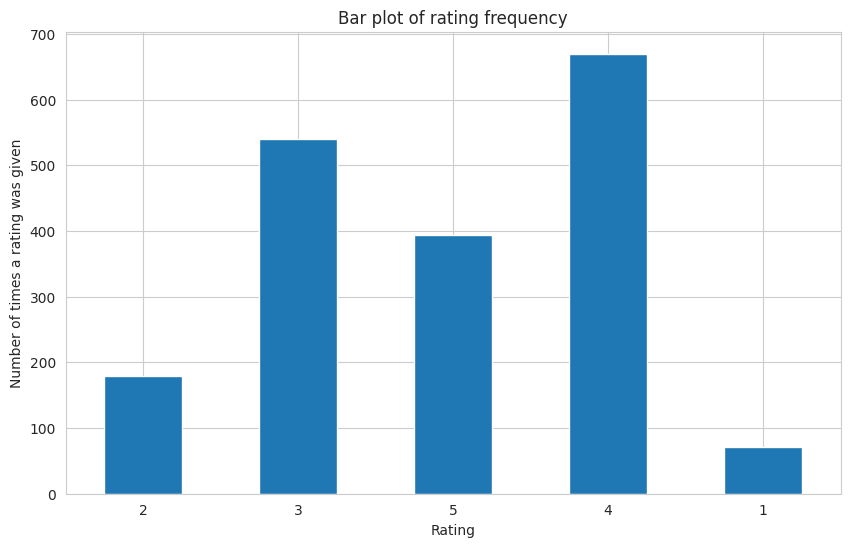

Total number of users watched this Genre:  1854
  


In [ ]:
star_based_visualization(merged_genre_movies)

In [ ]:
high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
high_rated_movies = high_rated_movies.to_frame()
print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
high_rated_movies.head(10)

These are the top movies that can be naviely suggested to the new users for the requested movie genre: Western . Recommendations based on top average ratings.


,rating
movie title,
High Noon (1952),4.102273
"Wild Bunch, The (1969)",4.023256
Butch Cassidy and the Sundance Kid (1969),3.949074
"Magnificent Seven, The (1954)",3.942149
Once Upon a Time in the West (1969),3.868421
Unforgiven (1992),3.868132
"Good, The Bad and The Ugly, The (1966)",3.861314
Dead Man (1995),3.823529
Dances with Wolves (1990),3.792969


In [ ]:
popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
popular_movies_ingenre = popular_movies_ingenre.to_frame()
popular_movies_ingenre.reset_index(level=0, inplace=True)
popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']

In [ ]:
# popular_movies[popular_movies['Number of Users watched'] >= 400]
print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10)

These are the most popular movies which can be recommended to a new user in Western genre. Recommendations based on Popularity


,movie title,Number of Users watched
0,Dances with Wolves (1990),256
1,Butch Cassidy and the Sundance Kid (1969),216
2,Unforgiven (1992),182
3,"Good, The Bad and The Ugly, The (1966)",137
4,Maverick (1994),128
5,"Magnificent Seven, The (1954)",121
6,Tombstone (1993),108
7,Young Guns (1988),101
8,High Noon (1952),88
9,Legends of the Fall (1994),81


In [ ]:
highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,rating,Number of Users watched
0,High Noon (1952),4.102273,88
1,"Wild Bunch, The (1969)",4.023256,43
2,Butch Cassidy and the Sundance Kid (1969),3.949074,216
3,"Magnificent Seven, The (1954)",3.942149,121
4,Once Upon a Time in the West (1969),3.868421,38
5,Unforgiven (1992),3.868132,182
6,"Good, The Bad and The Ugly, The (1966)",3.861314,137
7,Dead Man (1995),3.823529,34
8,Dances with Wolves (1990),3.792969,256
9,Tombstone (1993),3.666667,108


In [ ]:
viewer_limit = 300
ratings_limit = 4.0
count = 0
check = 0
while viewer_limit > 0 and ratings_limit > 0:
  s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_limit) & (highly_rated_popular_movies['rating']>=ratings_limit)]
  if len(s) < 11:
    if check == 0:
      viewer_limit -= 50
      check = 1
    else:
      ratings_limit -= 0.5
      check = 0
  else:
    break
s

,movie title,rating,Number of Users watched
0,High Noon (1952),4.102273,88
2,Butch Cassidy and the Sundance Kid (1969),3.949074,216
3,"Magnificent Seven, The (1954)",3.942149,121
5,Unforgiven (1992),3.868132,182
6,"Good, The Bad and The Ugly, The (1966)",3.861314,137
8,Dances with Wolves (1990),3.792969,256
9,Tombstone (1993),3.666667,108
10,Maverick (1994),3.468750,128
11,Legends of the Fall (1994),3.456790,81
13,Young Guns (1988),3.207921,101


In [ ]:
a, r = 20,5.0
# highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']<a) & (highly_rated_popular_movies['rating']<r)]
len(popular_movies_ingenre)

27

In [ ]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 1], [4, 5, 6]], columns = ["a", "b", "c"])
print(df)

   a  b  c
0  1  2  3
1  4  5  1
2  4  5  6


In [ ]:
df = df.sort_values(["b", "c"], ascending = (False, False))
print(df)

   a  b  c
2  4  5  6
1  4  5  1
0  1  2  3


In [ ]:
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mu = dataset['rating'].mean()
print(mu)


3.52986


In [ ]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]

,user id,movie id,rating,timestamp,movie title
4800,894,246,4,882404137,Chasing Amy (1997)
22340,894,268,3,879896041,Chasing Amy (1997)


In [ ]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
# num_users = len(refined_dataset.rating.unique())
# num_items = len(refined_dataset.movieId.unique())
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))


Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


In [ ]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

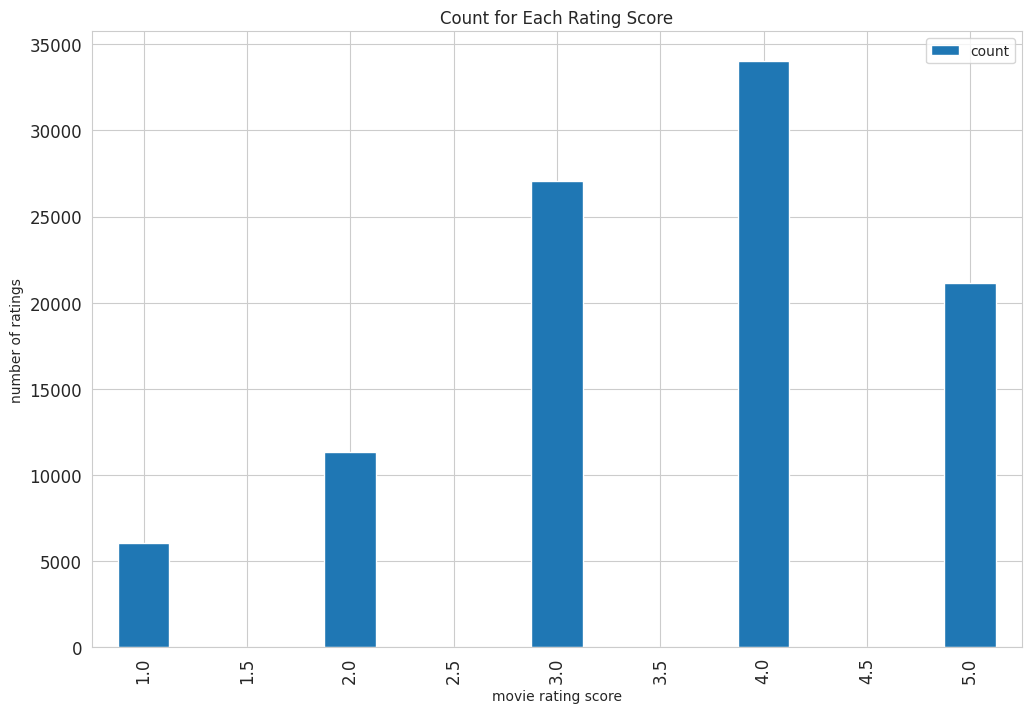

In [ ]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [ ]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [ ]:
# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

<ipython-input-67-ab3fe99e695d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count_df = rating_count_df.append(


,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [ ]:
# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.0,1469459,14.200405
1.0,6083,8.713253
1.5,3,1.098612
2.0,11334,9.335562
2.5,6,1.791759
3.0,27060,10.205812
3.5,19,2.944439
4.0,34042,10.435350
4.5,16,2.772589
5.0,21130,9.958449


In [ ]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


Text(0, 0.5, 'number of ratings')

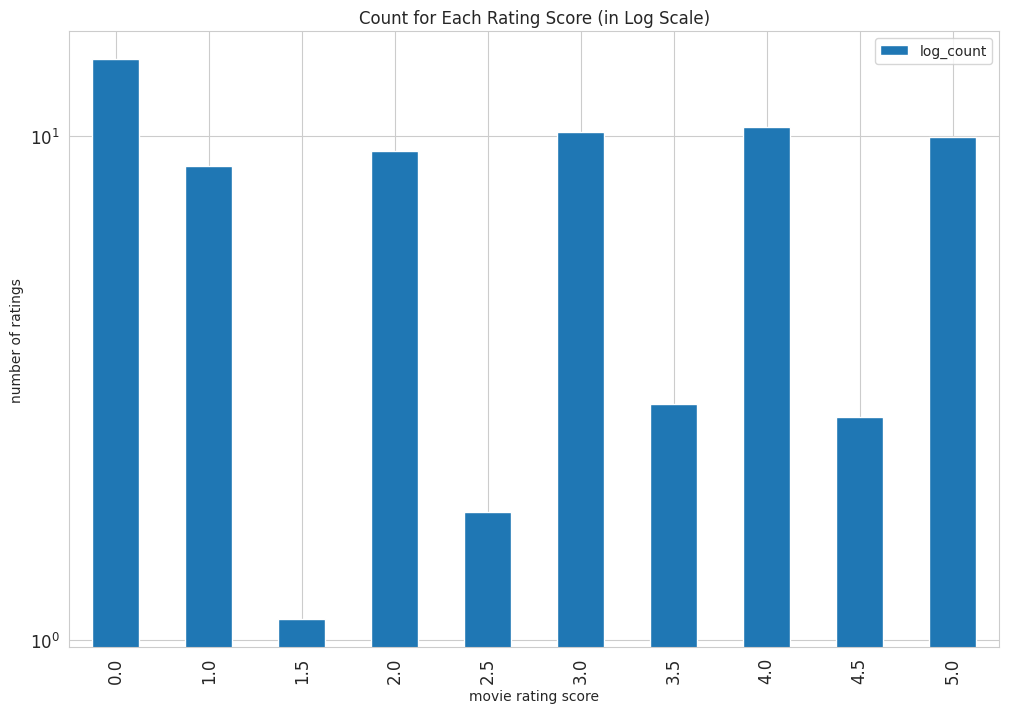

In [ ]:
ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [ ]:
refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=['count'])
movies_count_df.head()

,count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

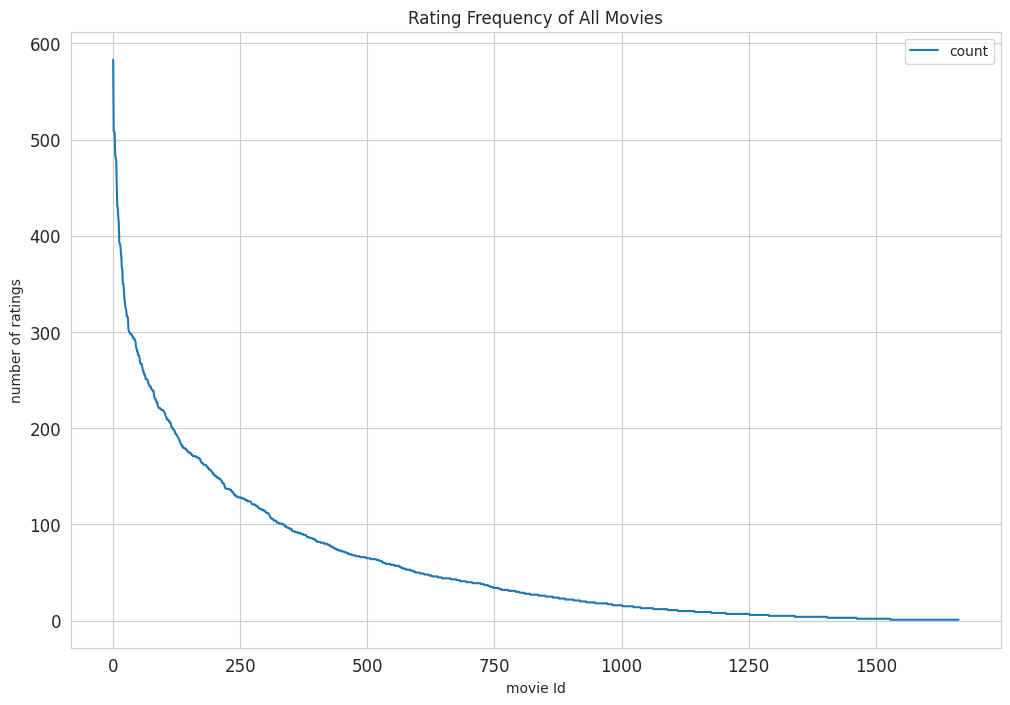

In [ ]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [ ]:
# pivot and create movie-user matrix
user_to_movie_df = refined_dataset.pivot(
    index='user id',
     columns='movie title',
      values='rating').fillna(0)

user_to_movie_df.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
user_to_movie_sparse = csr_matrix(user_to_movie_df.values)

In [ ]:
user_to_movie_df = user_to_movie_df.fillna(0)
user_to_movie_sparse = csr_matrix(user_to_movie_df.values)

In [ ]:
column_averages = user_to_movie_df.mean(axis=0)

In [ ]:
column_averages = user_to_movie_df.mean(axis=0)

for movie, average_rating in column_averages.iteritems():
    print(f"Average rating for {movie}: {average_rating:.2f}")


Average rating for 'Til There Was You (1997): 0.02
Average rating for 1-900 (1994): 0.01
Average rating for 101 Dalmatians (1996): 0.34
Average rating for 12 Angry Men (1957): 0.58
Average rating for 187 (1997): 0.13
Average rating for 2 Days in the Valley (1996): 0.32
Average rating for 20,000 Leagues Under the Sea (1954): 0.27
Average rating for 2001: A Space Odyssey (1968): 1.09
Average rating for 3 Ninjas: High Noon At Mega Mountain (1998): 0.01
Average rating for 39 Steps, The (1935): 0.25
Average rating for 8 1/2 (1963): 0.15
Average rating for 8 Heads in a Duffel Bag (1997): 0.01
Average rating for 8 Seconds (1994): 0.02
Average rating for A Chef in Love (1996): 0.03
Average rating for Above the Rim (1994): 0.02
Average rating for Absolute Power (1997): 0.45
Average rating for Abyss, The (1989): 0.57
Average rating for Ace Ventura: Pet Detective (1994): 0.33
Average rating for Ace Ventura: When Nature Calls (1995): 0.10
Average rating for Across the Sea of Time (1995): 0.01
Aver

In [ ]:
column_names1 = ['user id','movie id','rating','timestamp']
datatest = pd.read_csv('ml-100k/u1.test', sep='\t',header=None,names=column_names1)
datatest.head()

,user id,movie id,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [ ]:
# pivot and create movie-user matrix
user_to_movie_df = refined_dataset.pivot(
    index='user id',
     columns='movie title',
      values='rating').fillna(0)

user_to_movie_df.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
data = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
data = data[data['user_id'] <= 100]  # Keep only the first 100 users
data = data[data['item_id'] <= 200]  # Keep only the first 200 movies

In [ ]:
matrix = data.pivot(index='user_id', columns='item_id', values='rating')

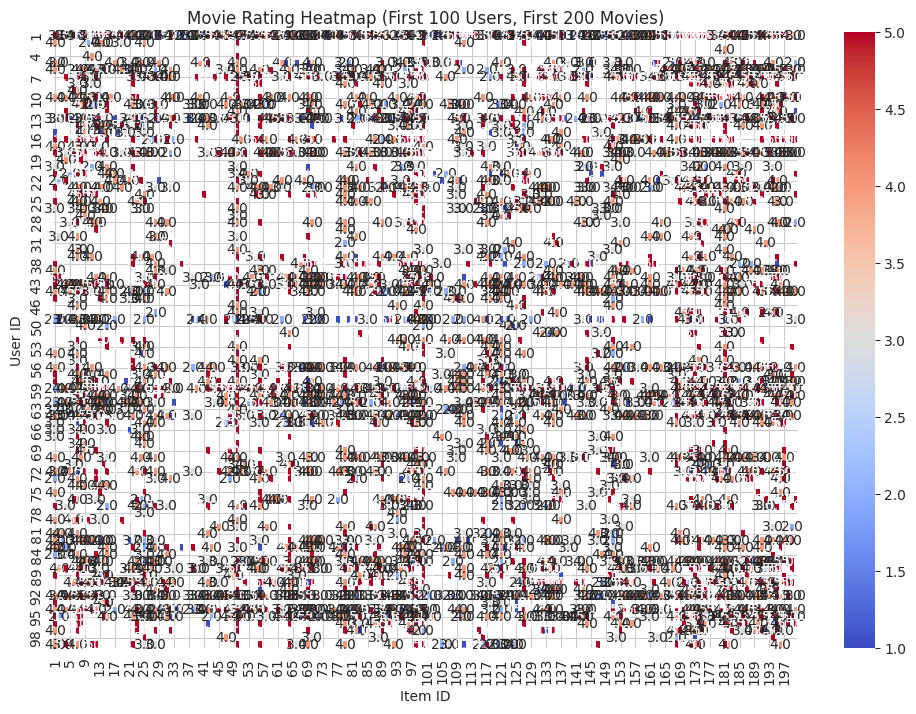

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Movie Rating Heatmap (First 100 Users, First 200 Movies)')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

In [ ]:
num_movies = data.groupby('user_id')['item_id'].count()


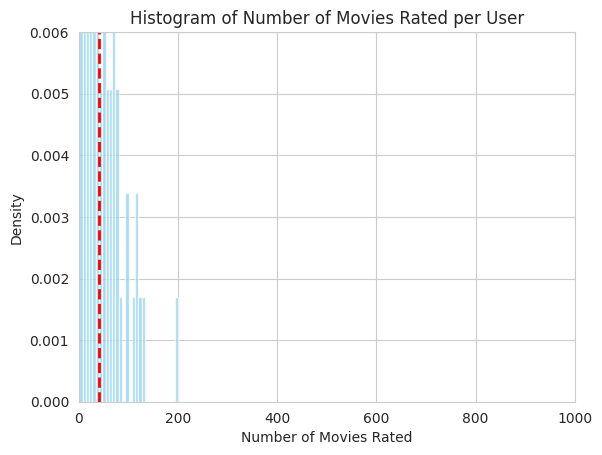

In [ ]:
plt.hist(num_movies, bins=30, density=True, color='skyblue', alpha=0.7)
plt.axvline(num_movies.mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram of Number of Movies Rated per User')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Density')
plt.xlim(0, 1000)
plt.ylim(0, 0.006)
plt.show()

In [ ]:
mean_ratings = data.groupby('user_id')['rating'].mean()

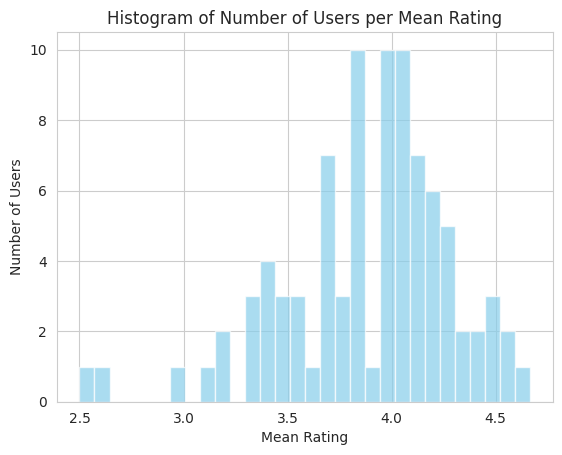

In [ ]:
plt.hist(mean_ratings, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Number of Users per Mean Rating')
plt.xlabel('Mean Rating')
plt.ylabel('Number of Users')
plt.show()

# Sparse Matrice

In [ ]:
from scipy.sparse import coo_matrix

In [ ]:
import numpy as np

In [ ]:
data = np.loadtxt('ml-100k/u.data', dtype=int, usecols=(0, 1, 2))

In [ ]:
user_ids = data[:, 0]
movie_ids = data[:, 1]
ratings = data[:, 2]


In [ ]:
user_ids -= 1
movie_ids -= 1

In [ ]:
num_users = len(np.unique(user_ids))
num_movies = len(np.unique(movie_ids))

In [ ]:
sparse_ratings = coo_matrix((ratings, (user_ids, movie_ids)), shape=(num_users, num_movies))

In [ ]:
print(sparse_ratings.toarray())

[[5 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]]


# Premier Modele : Simple Overall Average

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On définit les colonnes de notre dataset
columns=['u','m','r','t']

# On télécharge et extrait notre dataset
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

# On lit notre dataset d'entraînement et on calcule la moyenne des notes
dataset=pd.read_table('ml-100k/u1.base', sep='\t', names=columns)
mu=dataset['r'].mean()

# On initialise une matrice R de dimensions (943,1682) à zéro
R=np.zeros((943,1682))

# On lit notre dataset d'entraînement et on remplit la matrice R avec les notes données par les utilisateurs
base=pd.read_table('ml-100k/u1.base',sep='\t',names=columns)
N=80000
for i in range (N):
  n1=base['u'][i]-1;
  n2=base['m'][i]-1;
  r=base['r'][i];
  R[n1][n2]=r;

# On initialise un vecteur Vp de dimensions (20000,1) avec la moyenne des notes de l'ensemble d'entraînement
Vp=np.zeros((20000,1))
for i in range (20000):
  Vp[i]=mu

# On lit notre dataset de test
test=pd.read_table('ml-100k/u1.test',sep='\t',names=columns)

# On stocke les notes réelles dans le vecteur Vr
Vr=test['r']

# On importe les librairies pour calculer la racine de l'erreur quadratique moyenne
import math
import sklearn.metrics
from sklearn.metrics import mean_squared_error

# On calcule la racine de l'erreur quadratique moyenne entre les notes réelles et les notes prédites
rmse1=np.sqrt(mean_squared_error(Vr,Vp))
print('RMSE1 = ',rmse1)


File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip
RMSE1 =  1.1536759477860323


# Deuxiéme Modele : Movie effect multi-variate model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On définit les colonnes de notre dataset
columns=['u','m','r','t']

# On télécharge et extrait notre dataset
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

# On lit notre dataset d'entraînement et on calcule la moyenne des notes
dataset=pd.read_table('ml-100k/u1.base', sep='\t', names=columns)
mu=dataset['r'].mean()

# On initialise une matrice R de dimensions (943,1682) à zéro
R=np.zeros((943,1682))

# On lit notre dataset d'entraînement et on remplit la matrice R avec les notes données par les utilisateurs
base=pd.read_table('ml-100k/u1.base',sep='\t',names=columns)
N=80000
for i in range (N):
  n1=base['u'][i]-1;
  n2=base['m'][i]-1;
  r=base['r'][i];
  R[n1][n2]=r;

# On crée une liste vide pour stocker les moyennes de chaque colonne
mean_values = []

# Pour chaque colonne de R
for i in range(R.shape[1]):
    # On récupère la colonne
    col = R[:,i]
    # On sélectionne les valeurs non nulles
    non_zero = col[col != 0]
    # Si la colonne contient des valeurs non nulles
    if len(non_zero) > 0:
        # On calcule la moyenne des valeurs non nulles
        mean = np.mean(non_zero)
        # On ajoute la moyenne à la liste des moyennes
        mean_values.append(mean)
    # Si la colonne ne contient que des zéros
    else:
        # On ajoute un zéro à la liste des moyennes
        mean_values.append(0)

# On ajoute la moyenne globale mu à chaque moyenne de colonne et on stocke le résultat dans une nouvelle liste Y
Y = mean_values
# On charge le fichier de test
test = pd.read_table('ml-100k/u1.test',sep='\t',names=columns)

# On crée une liste vide Vp1 pour stocker les prédictions
Vp1 = []
# On crée une liste vide Vp pour stocker les prédictions normalisées
Vp = []
# On définit la taille de la liste Vp1 à N1 = 20000
N1 = 20000

# Pour chaque ligne du fichier de test
for i in range(0,N1):
    # On récupère l'identifiant du film
    movie_id = test['m'][i]-1
    # On ajoute la moyenne Y correspondante à l'identifiant du film à la liste Vp1
    Vp1.append(Y[movie_id])

# Pour chaque valeur de la liste Vp1
for x in Vp1:

    Vp.append(x)

# On récupère les vraies valeurs de notes du fichier de test
Vr = test['r']

# On calcule la racine carrée de l'erreur quadratique moyenne (RMSE) entre les vraies valeurs de notes et les prédictions normalisées
rmse2 = np.sqrt(mean_squared_error(Vr,Vp))

# On affiche la valeur de RMSE
print('RMSE2 = ',rmse2)


File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip
RMSE2 =  1.0360619559729183


# Troisième Modèle : Movie and user effect multi-variate model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On définit les colonnes de notre dataset
columns=['u','m','r','t']

# On télécharge et extrait notre dataset
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

# On lit notre dataset d'entraînement et on calcule la moyenne des notes
dataset=pd.read_table('ml-100k/u1.base', sep='\t', names=columns)
mu=dataset['r'].mean()

# On initialise une matrice R de dimensions (943,1682) à zéro
R=np.zeros((943,1682))

# On lit notre dataset d'entraînement et on remplit la matrice R avec les notes données par les utilisateurs
base=pd.read_table('ml-100k/u1.base',sep='\t',names=columns)
N=80000
for i in range (N):
  n1=base['u'][i]-1;
  n2=base['m'][i]-1;
  r=base['r'][i];
  R[n1][n2]=r;

# Calculer la moyenne de chaque colonne
mean_valuesM = []
for i in range(R.shape[1]):
      col = R[:,i]
      non_zero = col[col != 0] # Sélectionner seulement les valeurs non nulles dans la colonne
      if len(non_zero) > 0:
          mean = np.mean(non_zero) # Calculer la moyenne des valeurs non nulles
          mean_valuesM.append(mean)
      else:
          mean_valuesM.append(0) # Si la colonne ne contient que des zéros, la moyenne est 0

# Afficher les moyennes de chaque colonne
mean_valuesM

# Calculer la moyenne de chaque ligne
mean_valuesU = []
for i in range(R.shape[0]):
    row = R[i,:]
    non_zero = row[row != 0] # Sélectionner seulement les valeurs non nulles dans la ligne
    if len(non_zero) > 0:
      mean = np.mean(non_zero) # Calculer la moyenne des valeurs non nulles
      mean_valuesU.append(mean)
    else:
      mean_valuesU.append(0) # Si la ligne ne contient que des zéros, la moyenne est 0

# Afficher les moyennes de chaque ligne
mean_valuesU

# Charger le fichier de test
test=pd.read_table('ml-100k/u1.test',sep='\t',names=columns)
test

# Préparer la liste des prédictions
Vp1=[]
Vp=[]
N1=20000
for i in range (0,N1):
  # Ajouter la moyenne de la colonne correspondant à l'ID du film
  # Ajouter la moyenne de la ligne correspondant à l'ID de l'utilisateur
  # Ajouter la moyenne globale
  # Diviser par 3 pour obtenir une moyenne pondérée
  Vp1.append((mean_valuesM[test['m'][i]-1])+mean_valuesU[test['u'][i]-1]-mu)
for x in Vp1:
  Vp.append(x)

# Afficher les prédictions
Vp

# Charger les vraies valeurs
Vr=test['r']
Vr

# Calculer l'erreur RMSE entre les prédictions et les vraies valeurs
import math
import sklearn.metrics
from sklearn.metrics import mean_squared_error
rmse3=np.sqrt(mean_squared_error(Vr,Vp))
print('RMSE3 = ',rmse3)


File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip
RMSE3 =  0.9873673026468363


# Quatrième modèle : Regularized movie and user effect model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.metrics
from sklearn.metrics import mean_squared_error

# Définir les noms de colonnes et le lien du dataset
columns=['u','m','r','t']
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

# Télécharger et extraire le dataset
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

# Charger le dataset et calculer la valeur moyenne de r
dataset=pd.read_table('ml-100k/u1.base', sep='\t', names=columns)
mu=dataset['r'].mean()

# Initialiser la matrice R à zéro
R=np.zeros((943,1682))

# Charger les données de la base d'apprentissage dans R
base=pd.read_table('ml-100k/u1.base',sep='\t',names=columns)
N=80000
for i in range (N):
  n1=base['u'][i]-1;
  n2=base['m'][i]-1;
  r=base['r'][i];
  R[n1][n2]=r;

# Calculer le nombre de films notés pour chaque utilisateur (Ni) et chaque film noté (Nu)
Ni = []
for j in range(len(R[0])):
    count = 0
    for i in range(len(R)):
        if R[i][j] != 0:
            count += 1
    Ni.append(count)

Nu = []
for j in range(len(R)):
    count = 0
    for i in range(len(R[0])):
        if R[j][i] != 0:
            count += 1
    Nu.append(count)

# Calculer la valeur moyenne de chaque utilisateur et de chaque film
mean_valuesU = []
for i in range(R.shape[0]):
    row = R[i,:]
    non_zero = row[row != 0]
    if len(non_zero) > 0:
      mean = np.mean(non_zero)
      mean_valuesU.append(mean)
    else:
      mean_valuesU.append(0)

mean_valuesM = []
for i in range(R.shape[1]):
      col = R[:,i]
      non_zero = col[col != 0]
      if len(non_zero) > 0:
          mean = np.mean(non_zero)
          mean_valuesM.append(mean)
      else:
          mean_valuesM.append(0)

# Charger les données de la base de test
test=pd.read_table('ml-100k/u1.test',sep='\t',names=columns)

# Initialiser la liste des valeurs lambda à tester
lambdas = np.arange(0.5, 10, 0.25)
rmses = np.zeros(len(lambdas))

# Calculer la prédiction Vp pour chaque lambda et stocker dans la liste Vp1
Vp1=[]
for l in lambdas :
  Vp=[]
  N1=20000
  for i in range (0,N1):
    Vp.append((mean_valuesM[test['m'][i]-1])/(l)+((mean_valuesU[test['u'][i]-1])/(l))+(mu)*(1-(1/(l))-(1/(l))))
  Vp1.append(Vp)

# Calculer le RMSE pour chaque valeur de lambda et stocker dans la liste rmses
Vr=test['r']
rmses=[]
rmse4=0
for x in Vp1:
  rmse4=np.sqrt(mean_squared_error(Vr,x))
  rmses.append(rmse4)

rmses

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


[1.366246565661641,
 1.0646566836597906,
 0.9873673026468363,
 0.9727714179436335,
 0.9772103281795176,
 0.9872711559363423,
 0.9984763418162638,
 1.0092881283879853,
 1.0192160972204225,
 1.028159562242636,
 1.0361618404261748,
 1.0433140347693595,
 1.0497167543340888,
 1.055465341085668,
 1.0606448756631883,
 1.0653292434932233,
 1.0695818100725234,
 1.0734566433600374,
 1.0769998295572816,
 1.080250699518592,
 1.083242903838924,
 1.086005327294998,
 1.088562854715532,
 1.0909370075421856,
 1.0931464712517822,
 1.095207532154888,
 1.0971344395819433,
 1.0989397068807174,
 1.1006343622908301,
 1.1022281587339189,
 1.1037297498684115,
 1.1051468383737826,
 1.1064863013062858,
 1.1077542964618725,
 1.1089563529521331,
 1.1100974486115454,
 1.1111820763808624,
 1.1122143014293138]

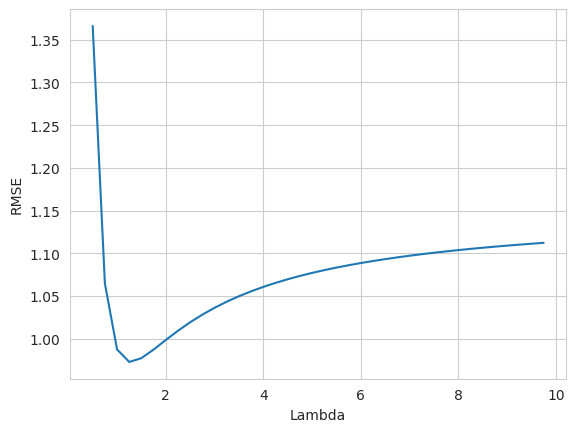

In [ ]:
plt.plot(lambdas,rmses)
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.show()

 L'optimum de Lambda:

In [ ]:
Opt_lambda= lambdas[np.argmin(rmses)]
Opt_lambda

1.25

In [ ]:
Opt_rmse4= rmses[np.argmin(rmses)]
print('RMSE4= ',Opt_rmse4)

RMSE4=  0.9727714179436335


In [ ]:
rmse1=1.1536759477860323
rmse2=1.0360619559729183
rmse3=0.9873673026468363
# Définir les noms des modèles et des RMSE correspondants
model_names = ['Simple Overall Average', 'Movie effect multi-variate model', 'Movie and user effect multi-variate model', 'Regularized movie and user effect model']
rmse_values = [rmse1, rmse2, rmse3, Opt_rmse4]

# Créer un dictionnaire avec les données
data = {'Modèle': model_names, 'RMSE': rmse_values}

# Créer un DataFrame pandas avec les données
df = pd.DataFrame(data)

# Afficher le tableau
print(df)

                                      Modèle      RMSE
0                     Simple Overall Average  1.153676
1           Movie effect multi-variate model  1.036062
2  Movie and user effect multi-variate model  0.987367
3    Regularized movie and user effect model  0.972771
